# Проверка гипотез по увеличению выручки в интернет-магазине

Отделом маркетинга крупного интернет-магазина подготовлен список гипотез для увеличения выручки. С помощью фреймворков ICE и RICE мы выполним приоритизацию гипотез. Затем запустим A/B-тест и проанализируем результаты.

**Задача исследования**

Приоритизировать гипотезы, проанализировать результаты A/B-теста.

**Ход исследования**

Для проведения исследования доступны следующие данные:

* data_hypothesis.csv — 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
* data_orders.csv, data_visitors.csv — результаты проведенного A/B-теста.

Перед решением задачи исследования понадобится обзор данных. Затем, на этапе предобработки, поищем возможность исправить самые критичные ошибки данных.

В первой части применим фреймворки ICE и RICE для приоритизации гипотез.

Во второй части проанализируем результаты A/B-теста.

В общем выводе подведем итоги исследования и примем решение по результатам теста.

**Этапы исследования**
1. Обзор данных.
2. Предобработка данных.
3. Часть 1. Приоритизация гипотез.
4. Выводы по части 1.
5. Часть 2. Анализ A/B-теста.
6. Выводы по части 2.
7. Выводы

## Обзор данных
Составим первое впечатление о входных данных.

In [1]:
# Импортируем библиотеки
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Читаем файлы с данными и сохраняем в датафреймы
hypothesis, orders, visitors = (
    pd.read_csv('data_hypothesis.csv'), # гипотезы
    pd.read_csv('data_orders.csv'), # заказы в A/B-тесте
    pd.read_csv('data_visitors.csv'), # визиты в A/B-тесте
)

In [3]:
# Обзора данных датафрейма hypothesis, получаем первые 5 строк
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Таблица содержит гипотезы и оценку 4-х параметров по 10-балльной шкале.

Согласно документации к данным:

* `Hypothesis` — краткое описание гипотезы
* `Reach` — охват пользователей по 10-балльной шкале
* `Impact` — влияние на пользователей по 10-балльной шкале
* `Confidence` — уверенность в гипотезе по 10-балльной шкале
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

В столбцах отмечено нарушение стиля — использование заглавных букв.

In [4]:
# Обзора данных датафрейма orders, получаем первые 5 строк
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Согласно документации к данным:

* `transactionId` — идентификатор заказа
* `visitorId` — идентификатор пользователя, совершившего заказ
* `date` — дата, когда был совершён заказ
* `revenue` — выручка заказа
* `group` — группа A/B-теста, в которую попал заказ

В столбцах отмечены нарушениея стиля — использование заглавных букв, слитное написание.

In [5]:
# Обзора данных датафрейма orders, получаем общую информацию
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Отмечено несоответствие типа данных документации:

`date` строка `object`, по документации дата → `datetime`

Пропусков значений нет.

In [6]:
# Обзора данных датафрейма visitors, получаем первые 5 строк
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Согласно документации к данным:

* `date` — дата
* `group` — группа A/B-теста
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [7]:
# Обзора данных датафрейма visitors, получаем общую информацию
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Отмечено несоответствие типа данных документации:

`date` строка `object`, по документации дата → `datetime`

Пропусков значений нет.

**Вывод**
<div style="background-color: #FBD603; width: 48px; height: 5px">&nbsp;</div>
 
Как и следовало из сопроводительной документации, мы располагаем списком гипотез, данными заказах и количестве пользователей во время проведения A/B-теста.

В столбцах отмечены нарушения стиля. Данные столбцов, описывающие даты, следует привести к типу данных datetime.

## Предобработка данных
Исправим именование столбцов. Проведем замену типов данных. Проверим данные на дубликаты.

### Стиль заголовков
Заменим в названиях столбцов заглавные буквы на строчные, уберем CamelCase.

In [8]:
# Заменяем заглавные на строчные в датафрейме hypothesis
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]

# Переименовываем столбцы в датафрейме orders
orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace=True)

Стиль названий столбцов приведен к корректному.

### Замена типа данных
Заменим тип данных столбцов, описывающих даты, на тип данных datetime с помощью pandas.to_datetime.

In [9]:
# Изменим тип данных на datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Тип данных столбцов, описывающих даты, приведен к корректному.

### Обработка дубликатов
Проверим данные на явные строковые дубликаты.

In [10]:
print(f'Дубликаты в orders: {orders.duplicated().sum()}')

Дубликаты в orders: 0


In [11]:
print(f'Дубликаты в visitors: {visitors.duplicated().sum()}')

Дубликаты в visitors: 0


Явные дубликаты отсутствуют.

### Уникальность пользователей по группам
Проверим, что пользователи корректно разнесены по группам — одному Visitor ID соответствует одна из двух групп A/B-теста.

In [12]:
# Найдем число пользователей, которые встречаются сразу в двух группах
visitor_id_a = (
    orders[orders['group'] == 'A']['visitor_id'].drop_duplicates()
)
visitor_id_b = (
    orders[orders['group'] == 'B']['visitor_id'].drop_duplicates()
)

print(
    'Число пользователей, находящиеся в двух группах теста:',
    len(visitor_id_a[visitor_id_a.isin(visitor_id_b)])
)

print(
    'Число уникальных пользователей:',
    orders['visitor_id'].nunique()
)

Число пользователей, находящиеся в двух группах теста: 58
Число уникальных пользователей: 1031


58 пользователей учитываются одновременно в двух группах A/B-теста. Данные собраны некорретно, вероятно, в результате неправильной настройки теста. Доля таких пользователей составляет 5,6% от всех уникальных пользователей.

**Вывод**
<div style="background-color: #FBD603; width: 48px; height: 5px">&nbsp;</div>

На этапе предобработки данных мы исправили стиль заголовков и тип данных столбцов, описывающих даты. Мы установили, что явные дубликаты отсутствуют.

Данные A/B-теста собраны некорректно, 5,6% пользователей одновременно присутствуют в двух группах. Стоит учесть наличие ошибки в данных при анализе результатов A/B-теста.

## Часть 1. Приоритизация гипотез
Применим фреймворки ICE и RICE для приоритизации гипотез.

### Фреймворк ICE

In [13]:
# Рассчитаем ICE Score и отсортируем гипотезы по убыванию приоритета
hypothesis['ice'] = (
    (hypothesis['impact'] * hypothesis['confidence'])
    / hypothesis['efforts']
)
(
    hypothesis[['hypothesis', 'ice']]
    .sort_values(by='ice', ascending=False)
    .style
    .format({'ice': '{:.1f}'})
    .background_gradient(cmap='YlGn')
)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


При применении фреймворка ICE наибольший приоритет (*16,2*) получила гипотеза *Запустить акцию, дающую скидку на товар в день рождения*.

### Фреймворк RICE

In [14]:
# Рассчитаем RICE Score и отсортируем гипотезы по убыванию приоритета
hypothesis['rice'] = (
    (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])
    / hypothesis['efforts']
)
(
    hypothesis[['hypothesis', 'rice']]
    .sort_values(by='rice', ascending=False)
    .style
    .format({'ice': '{:.1f}', 'rice': '{:.1f}'})
    .background_gradient(cmap='YlGn')
)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении фреймворка RICE наибольший приоритет (*112*) получила гипотеза *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*.

Проранжируем получившиеся значения ICE и RICE и посмотрим, как расположились гипотезы по приоритету при оценке с помощью двух фреймворков одновременно.

In [15]:
# Ранжируем приоритеты ICE и RICE,
# суммируем получившиеся ранги
hypothesis['ice_rank'] = hypothesis['ice'].rank(ascending=False)
hypothesis['rice_rank'] = hypothesis['rice'].rank(ascending=False)
hypothesis['rank'] = hypothesis['ice_rank'] + hypothesis['rice_rank']

# Располагаем гипотезы по рангам,
# наименьший ранг означает наивысший приоритет по ICE и RICE
(
    hypothesis[['hypothesis', 'rank']]
    .sort_values(by='rank')
    .style
    .format({'rank': '{:.1f}'})
    .background_gradient(cmap='YlGn')
)

,hypothesis,rank
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",4.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",5.5
8,"Запустить акцию, дающую скидку на товар в день рождения",6.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",7.5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",13.5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",14.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",14.5
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",18.0


Гипотезы в таблице расположены с учетом приоритизации одновременно по ICE и RICE. Самый высокий приоритет имеет гипотеза  *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*.

## Выводы по части 1

При приоритизации гипотез с помощью RICE вместо ICE учитывается фактор Reach, учитывающий, как много пользователей охватит предложенное изменение.

Гипотеза *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок* имеет максимальное значение Reach и среднее значение Efforts, благодаря чему оказалась самой приоритетной. Эта гипотеза имеет самый высокий приоритет при ранжировании одновременно по ICE и RICE.

Гипотеза *Запустить акцию, дающую скидку на товар в день рождения* имеет минимальное значение Reach, из-за чего при изменение фреймворка с ICE на RICE опустилась с наивысшего уровня приоритета на пятый.

## Часть 2. Анализ A/B-теста
Проанализируем результаты A/B-теста, примем решение по результатам теста.

### Кумулятивная выручка по группам

In [16]:
# Создаем массив уникальных пар значений дат и групп
dates_groups = orders[['date', 'group']].drop_duplicates()

# Получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'],
        orders['group'] == x['group'])
    ]
    .agg(
        {'date': 'max',
        'group': 'max',
        'transaction_id': 'nunique',
        'visitor_id': 'nunique',
        'revenue': 'sum'}
    ), axis=1).sort_values(by=['date', 'group'])
                    
# Получаем агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'],
        visitors['group'] == x['group'])
    ]
    .agg(
        {'date': 'max',
         'group': 'max',
         'visitors': 'sum'}
    ), axis=1).sort_values(by=['date', 'group'])

# Объединяем кумулятивные данные в один датафрейм
cumulative_data = orders_aggregated.merge(
    visitors_aggregated,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)

# Переименовываем столбцы
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors'
]

# Проверяем полученный датафрейм, выводим первые 5 строк
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


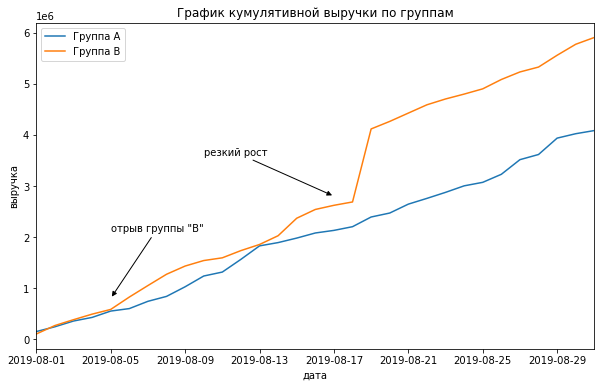

In [17]:
# Датафрейм с кумулятивной выручкой
# и кумулятивным количеством заказов по дням в группе "A"
cumulative_revenue_a = (
    cumulative_data[cumulative_data['group'] == 'A']
    [['date', 'revenue', 'orders']]
)

# Датафрейм с кумулятивной выручкой
# и кумулятивным количеством заказов по дням в группе "B"
cumulative_revenue_b = (
    cumulative_data[cumulative_data['group'] == 'B']
    [['date', 'revenue', 'orders']]
)

# Строим графики
plt.figure(figsize=(10, 6))
test_start_date = min(cumulative_data['date'])
test_stop_date = max(cumulative_data['date'])

# График выручки группы "A"
plt.plot(
    cumulative_revenue_a['date'],
    cumulative_revenue_a['revenue'],
    label='Группа A')

# График выручки группы "B"
plt.plot(
    cumulative_revenue_b['date'],
    cumulative_revenue_b['revenue'],
    label='Группа B')

plt.xlim(test_start_date, test_stop_date)
plt.legend()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.annotate(
    'отрыв группы "B"',
    xy=(cumulative_revenue_a.loc[8, 'date'], 800000),
    xytext=(cumulative_revenue_a.loc[8, 'date'], 2100000),
    arrowprops=dict(arrowstyle='-|>', facecolor='black')
)
plt.annotate(
    'резкий рост',
    xy=(cumulative_revenue_a.loc[32, 'date'], 2800000),
    xytext=(cumulative_revenue_a.loc[18, 'date'], 3600000),
    arrowprops=dict(arrowstyle='-|>', facecolor='black')
)
plt.show()

Выручка практически равномерно увеличивается в течение всего теста.

Первые 5 дней теста выручка в обеих группах увеличивается одинаково, а после кумулятивная выручка в группе B превышает кумулятивную выручку в группе A.

На графике группы B виден резкий рост кумулятивной выручки 19 августа 2019. Такой рост может быть связан с выбросами в данных — аномальном количестве или слишком высокой стоимости заказов.

### Кумулятивный средний чек по группам

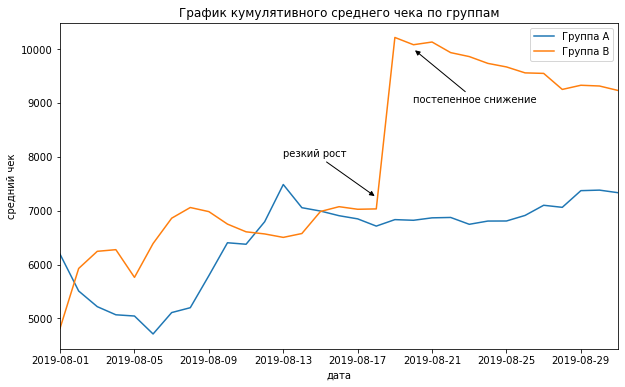

In [18]:
# Строим графики
plt.figure(figsize=(10, 6))

# График кумулятивного среднего чека группы "A"
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'], label='Группа A')

# График кумулятивного среднего чека группы "B"
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], label='Группа B')

plt.xlim(test_start_date, test_stop_date)
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.annotate(
    'резкий рост',
    xy=(cumulative_revenue_a.loc[34, 'date'], 7250),
    xytext=(cumulative_revenue_a.loc[24, 'date'], 8000),
    arrowprops=dict(arrowstyle='-|>', facecolor='black')
)
plt.annotate(
    'постепенное снижение',
    xy=(cumulative_revenue_a.loc[38, 'date'], 10000),
    xytext=(cumulative_revenue_a.loc[38, 'date'], 9000),
    arrowprops=dict(arrowstyle='-|>', facecolor='black')
)
plt.show()

Первые 10 дней теста кумулятивный средний чек устанавливается на уровне около 7000 для обеих групп.

На графике группы B виден резкий рост кумулятивного среднего чека 19 августа 2019. Такой рост может быть связан с выбросами в данных. После резкого роста кумулятивный средний чек постепенно снижается, вероятно, влияние выбросов компенсируется накоплением корректных значений.

Кумулятивный средний чек в группе к конце теста начинает постепенно повышаться.

### Относительное изменения кумулятивного среднего чека группы B к группе A

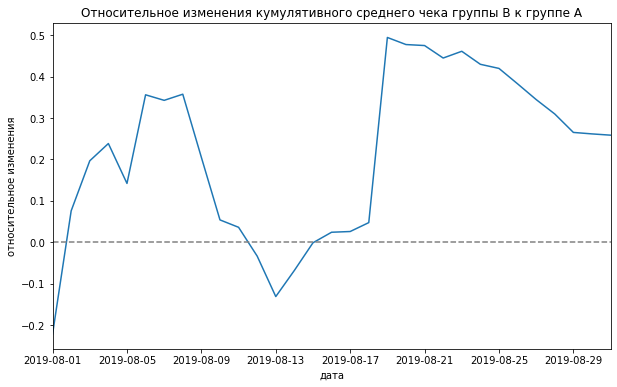

In [19]:
# Собираем данные в одном датафрейме
merged_cumulative_revenue = (
    cumulative_revenue_a
    .merge(
        cumulative_revenue_b,
        left_on='date',
        right_on='date',
        how='left',
        suffixes=['_a', '_b']
    )
)

# Строим график
plt.figure(figsize=(10, 6))

# Отношение средних чеков
plt.plot(
    merged_cumulative_revenue['date'],
    (merged_cumulative_revenue['revenue_b'] / merged_cumulative_revenue['orders_b'])
    / (merged_cumulative_revenue['revenue_a'] / merged_cumulative_revenue['orders_a']) - 1
)

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlim(test_start_date, test_stop_date)
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('относительное изменения')
plt.show()

6-7 августа 2019 кумулятивный средний чек группы B значительно выше среднего чека в группе A за счет роста среднего чека в группе B с одновременным снижением показателя в группе A.

Последовавший с 8 по 13 августа 2019 рост среднего чека в группе A отражен на графике в виде ухода относительного изменения в отрицательную область.

Также на графике отражен резкий рост кумулятивного среднего чека 19 августа 2019 в группе B и последующее его снижение, что, по всей видимости, связано с наличием выбросов в данных группы.

### Кумулятивная конверсия по группам

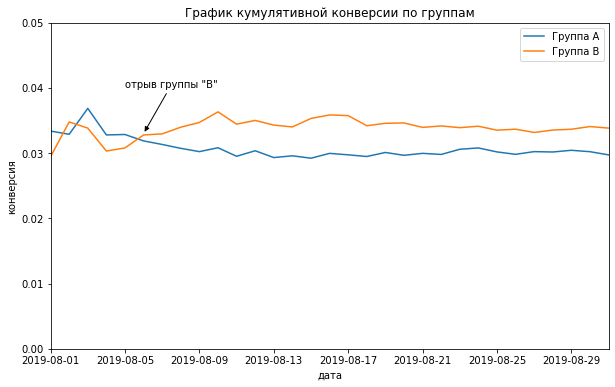

In [20]:
# Считаем кумулятивную конверсию
cumulative_data['conversion'] = (
    cumulative_data['orders'] / cumulative_data['visitors']
)

# Датафрейм с данными группы "A"
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

# Датафрейм с данными группы "B"
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# Строим графики
plt.figure(figsize=(10, 6))

# График кумулятивной конверсии группы "A"
plt.plot(
    cumulative_data_a['date'],
    cumulative_data_a['conversion'],
    label='Группа A'
)

# График кумулятивной конверсии группы "B"
plt.plot(
    cumulative_data_b['date'],
    cumulative_data_b['conversion'],
    label='Группа B'
)

plt.xlim(test_start_date, test_stop_date)
plt.ylim(0, 0.05)
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.annotate(
    'отрыв группы "B"',
    xy=(cumulative_data_a.loc[10, 'date'], 0.033),
    xytext=(cumulative_data_a.loc[8, 'date'], 0.04),
    arrowprops=dict(arrowstyle='-|>', facecolor='black')
)
plt.show()

В первые 6 дней теста кумулятивная конверсия группы A была выше.

После 6 августа 2019 кумулятивная конверсия группы B стабильно превышает значение показателя группы А. Оба показателя достаточно стабильны с середины срока тестирования.

На данном этапе тестовый вариант B является предпочтительным благодаря более высокой конверсии.

### Относительное изменение кумулятивной конверсии группы B к группе A

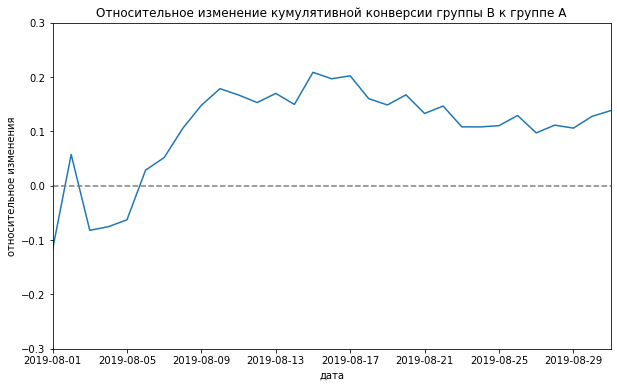

In [21]:
# Собираем данные в одном датафрейме
merged_cumulative_conversion = (
    cumulative_data_a[['date', 'conversion']]
    .merge(
        cumulative_data_b[['date', 'conversion']],
        left_on='date',
        right_on='date',
        how='left',
        suffixes=['_a', '_b']
    )
)

# Строим график
plt.figure(figsize=(10, 6))

# Отношение конверсий
plt.plot(
    merged_cumulative_conversion['date'],
    merged_cumulative_conversion['conversion_b'] / merged_cumulative_conversion['conversion_a'] - 1
)

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlim(test_start_date, test_stop_date)
plt.ylim(-0.3, 0.3)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('дата')
plt.ylabel('относительное изменения')
plt.show()

С 6 августа 2019 кумулятивная конверсия группы B превышает показатель группы A.

Относительное изменение достигает максимального значения к середине срока теста, далее плавно снижается и в последние дни теста показывает небольшой рост.

На данном этапе тестовый вариант B является предпочтительным благодаря конверсии на 15% превосходящей конверсию тестового варианта A.

### Количество заказов по пользователям

In [22]:
# Считаем количество заказов на пользователя
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

# Переименовываем столбцы
orders_by_users.columns = ['visitor_id', 'orders']

# Выводим топ-10 пользователей по количеству заказов
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


За время теста были пользователи, совершившие 11, 9, 8, 5 заказов. Проверим, сколько заказов в среднем делали пользователи, посмотрев распределение на точечной диаграмме.

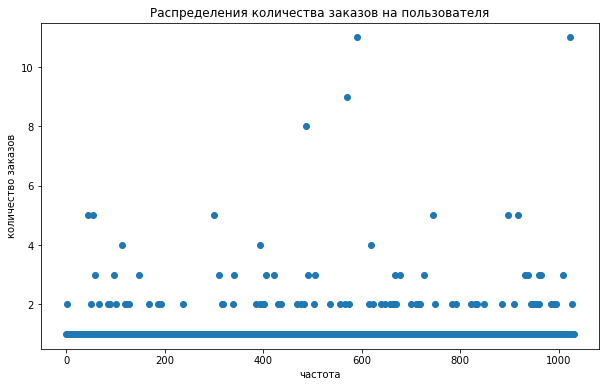

In [23]:
# Генерируем номера наблюдений
x_values = pd.Series(range(0, len(orders_by_users)))

# Точечная диаграмма распределения количества заказов на пользователя
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Распределения количества заказов на пользователя')
plt.xlabel('частота')
plt.ylabel('количество заказов')
plt.show()

Подавляющее большинство пользователей сделали 1 заказ. Также можно выделить пользователей с 2 и 3 заказами. Крайне редко встречаются пользователи с 4-5 заказами.

Данные о пользователях, совершивших более 5 заказов, вероятно, следует отнести к выбросам. Границу для определения аномальных пользователей выберем с помощью расчета перцентилей.

### Аномальные пользователи

In [24]:
# 95-й и 99-й перцентили количества заказов на пользователя
print(f'''95-й перцентиль: {np.percentile(orders_by_users['orders'], 95)}
99-й перцентиль: {np.percentile(orders_by_users['orders'], 99)}
''')

95-й перцентиль: 2.0
99-й перцентиль: 4.0



Не более 1% пользователей совершали более 4 заказов. Выберем 4 заказа на пользователя (99-й перцентиль) в качестве границы для определения аномальных пользователей.

### Стоимость заказов

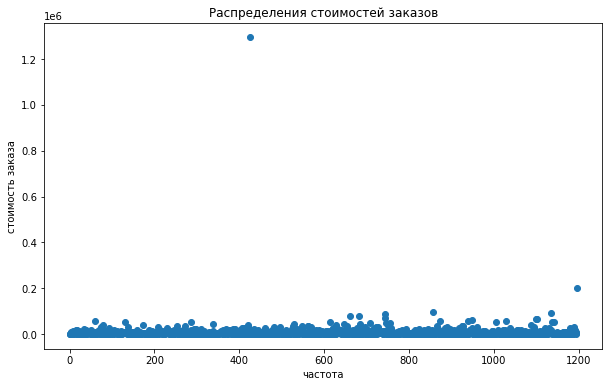

In [25]:
# Генерируем номера наблюдений
x_values = pd.Series(range(0, len(orders['revenue'])))

# Точечная диаграмма распределения стоимостей заказов
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределения стоимостей заказов')
plt.xlabel('частота')
plt.ylabel('стоимость заказа')
plt.show()

На диаграмме видно, что почти все заказы укладываются в стоимость до 100 000. Из-за одного заказа с очень высокой стоимостью (более 1 200 000) трудно оценить, данные с какой стоимостью заказа считать выбросами. Воспользуюемся расчетом перцентилей для определения границы анамальных заказов.

### Аномальные заказы

In [26]:
# 95-й и 99-й перцентили стоимости заказов
print(f'''95-й перцентиль: {round(np.percentile(orders['revenue'], 95), 2)}
99-й перцентиль: {round(np.percentile(orders['revenue'], 99), 2)}
''')

95-й перцентиль: 28000.0
99-й перцентиль: 58233.2



Не более 1% заказов имеют стоимость выше 58 233. Выберем стоимость заказа 58 233 (99-й перцентиль) в качестве границы для определения аномальных заказов.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [27]:
# Подготовим данные к статистическому анализу
# Количество пользователей в дату в группе "A"
visitors_a_daily = (
    visitors[visitors['group'] == 'A'][['date', 'visitors']]
)
visitors_a_daily.columns = [
    'date',
    'visitors_per_date_a'
]

# Количество пользователей в дату в группе "B"
visitors_b_daily = (
    visitors[visitors['group'] == 'B'][['date', 'visitors']]
)
visitors_b_daily.columns = [
    'date',
    'visitors_per_date_b'
]

In [28]:
# Совершенные заказы пользователей в группе "A",
# которые заказывали хотя бы раз
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

# Совершенные заказы пользователей в группе "B",
# которые заказывали хотя бы раз
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

In [29]:
# Число заказов пользователей в группе "A",
# включая пользователей с нулевым числом заказов
sample_a = pd.concat(
    [orders_by_users_a['orders'],
     pd.Series(0, index=np.arange(
         visitors_a_daily['visitors_per_date_a'].sum()
         - len(orders_by_users_a['orders'])
     ), name='orders')], axis=0
)

# Число заказов пользователей в группе "B",
# включая пользователей с нулевым числом заказов
sample_b = pd.concat(
    [orders_by_users_b['orders'],
     pd.Series(0, index=np.arange(
         visitors_b_daily['visitors_per_date_b'].sum()
         - len(orders_by_users_b['orders'])
     ), name='orders')], axis=0
)

Сформулируем проверяемые статистическим тестом гипотезы.

* **Нулевая гипотеза**: различий в конверсии между группами нет. С математической точки зрения: вероятность того, что наблюдение из популяции X превышает наблюдение из популяции Y равна 50%.
* **Альтернативная гипотеза**: конверсии в группах различаются. С математической точки зрения: вероятность того, что наблюдение из популяции X превышает наблюдение из популяции Y не равна 50%.

In [30]:
# Считаем p-value статистического критерия Манна-Уитни
print(
    'P-value:',
    '{0:.3f}'.format(stats.mannwhitneyu(
        sample_a,
        sample_b,
        alternative='two-sided'
    )[1])
)

# Считаем относительное различие в конверсии между группами
print(
    'Относительное различие:',
    '{0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1)
)

P-value: 0.017
Относительное различие: 0.138


Проведен расчет статистической значимости различий в конверсии между группами по "сырым" данным.

Полученное p-value меньше 0,05. Значит, **нулевую гипотезу** о том, что статистически значимых различий в конверсии между группами нет, **отвергаем**.

Относительный прирост конверсии группы "B" составил 13,8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем проверяемые статистическим тестом гипотезы.

* **Нулевая гипотеза**: различий в среднем чеке между группами нет.
* **Альтернативная гипотеза**: средний чек в группах различаются.

In [31]:
# Считаем p-value статистического критерия Манна-Уитни
print(
    'P-value:',
    '{0:.3f}'.format(stats.mannwhitneyu(
        orders[orders['group'] =='A']['revenue'],
        orders[orders['group'] =='B']['revenue'],
    alternative='two-sided')[1])
)

# Считаем относительное различие в среднем чеке между группами
print(
    'Относительное различие:',
    '{0:.3f}'.format(
        orders[orders['group'] == 'B']['revenue'].mean()
        / orders[orders['group'] == 'A']['revenue'].mean() - 1
    )
)

P-value: 0.729
Относительное различие: 0.259


Проведен расчет статистической значимость различий в среднем чеке заказа между группами по "сырым" данным.

Полученное p-value значительно больше 0,05. Значит, **нулевую гипотезу** о том, что статистически значимых различий в среднем чеке заказа между группами нет, **не получилось отвергнуть**.

Относительное различие в среднем чеке группы "B" составило 25,9%.

Вероятно, в группу "B" попал выброс, который существенно исказил значение среднего чека группы. Проверим это предположение, пересчитав показатель на "очищенных" данных.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [32]:
# Соберем аномальных пользователей в датафрейм
# для последующей "очистки" данных
# Пользователи с аномальным количеством заказов (более 4)
users_with_many_orders = pd.concat(
    [orders_by_users_a[orders_by_users_a['orders'] > 4]['visitor_id'],
     orders_by_users_b[orders_by_users_b['orders'] > 4]['visitor_id']],
    axis=0
)

# Пользователи с аномальной стоимостью заказа (более 58 233)
users_with_expensive_orders = orders[orders['revenue'] > 58233]['visitor_id']

# Объединяем списки аномальных пользователей,
# проверяем количество записей
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', len(abnormal_users))

Количество аномальных пользователей: 15


In [33]:
# Число заказов пользователей в группе "A",
# включая пользователей с нулевым числом заказов,
# исключая аномальных пользователей
sample_a_filtered = pd.concat(
    [orders_by_users_a[
        np.logical_not(
            orders_by_users_a['visitor_id'].isin(abnormal_users)
        )
    ]['orders'],
     pd.Series(0, index=np.arange(
         visitors_a_daily['visitors_per_date_a'].sum()
         - len(orders_by_users_a['orders'])
     ), name='orders')], axis=0
)

# Число заказов пользователей в группе "B",
# включая пользователей с нулевым числом заказов,
# исключая аномальных пользователей
sample_b_filtered = pd.concat(
    [orders_by_users_b[
        np.logical_not(
            orders_by_users_b['visitor_id'].isin(abnormal_users)
        )
    ]['orders'],
     pd.Series(0, index=np.arange(
         visitors_b_daily['visitors_per_date_b'].sum()
         - len(orders_by_users_b['orders'])
     ), name='orders')], axis=0
)

* **Нулевая гипотеза**: различий в конверсии между группами нет.
* **Альтернативная гипотеза**: конверсии в группах различаются.

In [34]:
# Считаем p-value статистического критерия Манна-Уитни
print(
    'P-value:',
    '{0:.3f}'.format(stats.mannwhitneyu(
        sample_a_filtered,
        sample_b_filtered,
        alternative='two-sided'
    )[1])
)

# Считаем относительное различие в конверсии между группами
print(
    'Относительное различие:',
    '{0:.3f}'.format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1)
)

P-value: 0.014
Относительное различие: 0.153


Проведен расчет статистической значимости различий в конверсии между группами по "очищенным" данным.

Полученное p-value меньше, чем при расчете по "сырым" данным, **нулевая гипотеза остается отвергнутой**. 

Относительное различие в конверсии группы "B" выше, чем при расчете по "сырым" данным (15,3% против 13,8%).

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

* **Нулевая гипотеза**: различий в среднем чеке между группами нет.
* **Альтернативная гипотеза**: средний чек в группах различаются.

In [35]:
# Считаем p-value статистического критерия Манна-Уитни
print(
    'P-value:',
    '{0:.3f}'.format(stats.mannwhitneyu(
        orders[
            np.logical_and(orders['group'] == 'A',
                           np.logical_not(
                               orders['visitor_id']
                                          .isin(abnormal_users)
                           )
                          )
        ]['revenue'],
        orders[
            np.logical_and(orders['group'] == 'B',
                           np.logical_not(
                               orders['visitor_id']
                                          .isin(abnormal_users)
                           )
                          )
        ]['revenue'], alternative='two-sided'
    )[1])
)


# Считаем относительное различие в среднем чеке между группами
print(
    'Относительное различие:',
    '{0:.3f}'.format(
        orders[
            np.logical_and(orders['group'] == 'B',
                           np.logical_not(
                               orders['visitor_id']
                                          .isin(abnormal_users)
                                         )
                          )]['revenue'].mean()
        / orders[
            np.logical_and(orders['group'] == 'A',
                           np.logical_not(
                               orders['visitor_id']
                                          .isin(abnormal_users)
                                         )
                          )]['revenue'].mean() -1
    )
)

P-value: 0.851
Относительное различие: -0.006


Проведен расчет статистической значимость различий в среднем чеке заказа между группами по "очищенным" данным.

Полученное p-value больше, чем при расчете по "сырым" данным, **нулевая гипотеза остается не отвергнутой**.

Относительное различие в среднем чеке группы "B" существенно изменилось по сравнению с расчетом по "сырым" данным и находится в отрицательной зоне (-0,6% против 25,9%).

Таким образом подтверждается предположение, что в группу "B" попал выброс, исказивший средний чек группы. При расчете статистического критерия Манна-Уитни выбросы не оказывают существенного влияния. Несмотря на огромное относительное различие среднего чека при расчете по "сырым" и очищенным" данным, p-value в обоих случая принимает близкие значения.

## Выводы по части 2

При проведении анализа A/B-теста установлены следующие факты: 
* Обнаружено статистически значимое различие по конверсии между группами по "сырым" и "очищенным" данным.
* По "очищенным" данным относительный прирост конверсии группы "B" составил 15,3%.
* Нет статистически значимого различия по среднему чеку между группами по "сырым" и "очищенным" данным.
* По "очищенным" данным относительное различие в среднем чеке группы "B" составило -0,6%.
* График различия конверсии между группами показывает установившуюся более высокую конверсию группы "B".
* График различия среднего чека показывает находится под влиянием выбросов. Можно прогнозировать дальнейшее снижение показателя для группы "B". Это обусловлено постепенным снижением влиянием крупного выброса на показатель кумулятивного среднего чека.

## Выводы

На этапе предобработки данных было выявлено, что **данные собраны некорректно**. 5,6% пользователей одновременно присутствуют в двух группах.

На этапе приоритизации гипотез при применении одновременно фреймворков ICE и RICE гипотеза *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок* выбрана приоритетной.

По результатам проведенного A/B-теста обнаружено статистически значимое различие по конверсии между группами. По "очищенным" данным относительный прирост конверсии группы "B" составил 15,3%. Нет статистически значимого различия по среднему чеку между группами.

Исходя из указанных фактов, можно дать рекомендацию **остановить тест и зафиксировать победу группы "B"**. Группа "B" характеризуется существенным положительным различием по конверсии при одинаковом среднем чеке.